# Building simple graphs

First we import our utility scripts and libraries

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt

project_dir = '/home/atoris/course-project-thomas-wright/src'
if project_dir not in sys.path:
    sys.path.insert(0, project_dir)


In [2]:
import datautil as du

Load our data again.

In [9]:
url = 'https://www.cpubenchmark.net/mid_range_cpus.html'
filename = 'cpu_data_encoded.csv'

df = du.load_data(url, filename)
df.info()
df.head(100)

/usr/home/atoris/course-project-thomas-wright/data/cpu_data_encoded.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           500 non-null    object 
 1   price          345 non-null    object 
 2   Socket         478 non-null    object 
 3   Clockspeed     500 non-null    float64
 4   Turbo Speed    300 non-null    float64
 5   Threads        500 non-null    int64  
 6   Cores          500 non-null    int64  
 7   Typical TDP    488 non-null    object 
 8   mt_score       500 non-null    int64  
 9   st_score       500 non-null    int64  
 10  class_Desktop  500 non-null    int64  
 11  class_Laptop   500 non-null    int64  
 12  class_Server   500 non-null    int64  
 13  brand_Amd      500 non-null    int64  
 14  brand_Intel    500 non-null    int64  
dtypes: float64(2), int64(9), object(4)
memory usage: 58.7+ KB


,name,price,Socket,Clockspeed,Turbo Speed,Threads,Cores,Typical TDP,mt_score,st_score,class_Desktop,class_Laptop,class_Server,brand_Amd,brand_Intel
0,Ryzen Threadripper PRO 3995WX,NaN,sTRX4,2.7,4.2,128,64,280,88673,2676,1,0,0,1,0
1,Ryzen Threadripper 3990X,"3,849.99",sTRX4,2.9,4.3,128,64,280,80508,2545,1,0,0,1,0
2,EPYC 7702,"6,229.00",SP3,2.0,3.4,128,64,200,71859,2096,0,0,1,1,0
3,EPYC 7702P,"4,088.00",SP3,2.0,3.4,128,64,200,68213,2210,0,0,1,1,0
4,EPYC 7742,"7,549.35",SP3,2.3,3.4,128,64,225,67185,2376,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Ryzen 7 3700X,304.99,AM4,3.6,4.4,16,8,65,22824,2690,1,0,0,1,0
96,Xeon Gold 6140,"2,863.75",FCLGA3647,2.3,3.7,36,18,140,22733,1840,0,0,1,0,1
97,Core i9-10900X,589.00,FCLGA2066,3.7,4.7,20,10,165,22697,2726,1,0,0,0,1
98,Xeon W-2255,778.00,FCLGA2066,3.7,4.7,20,10,165,22687,2776,0,0,0,0,1


Create a graph

<AxesSubplot:xlabel='st_score', ylabel='Turbo Speed'>

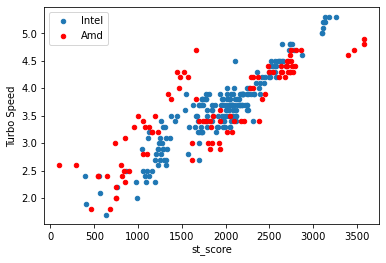

In [4]:
amd = df[df['brand_Amd'] == 1]
intel = df[df['brand_Intel'] == 1]




ax = intel.plot(y='Turbo Speed', x='st_score', kind='scatter', label="Intel")
amd.plot(y='Turbo Speed', x='st_score', kind='scatter', label="Amd", ax=ax, c="Red")

We can see a basic trend of a higher clock speed allowing for better single threaded performace

<AxesSubplot:xlabel='mt_score', ylabel='Cores'>

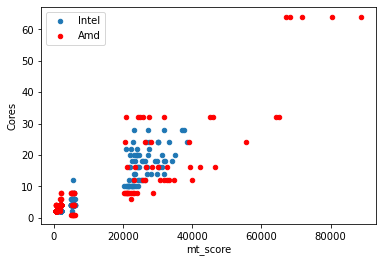

In [5]:

#amd = amd[amd['Threads'] == 4]
#intel = intel[intel['Threads'] == 4]


ax = intel.plot(y='Cores', x='mt_score', kind='scatter', label="Intel")
amd.plot(y='Cores', x='mt_score', kind='scatter', label="Amd", ax=ax, c="Red")

TypeError: 'value' must be an instance of str or bytes, not a float

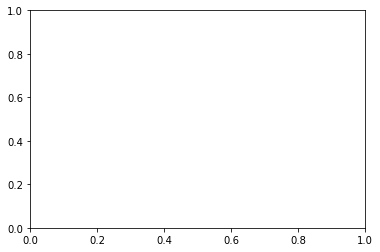

In [6]:
ax = intel.plot(y='Typical TDP', x='Cores', kind='scatter', label="Intel")
amd.plot(y='Typical TDP', x='Cores', kind='scatter', label="Amd", ax=ax, c="Red")